In [1]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\mo223\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\mo223\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
# 데이터 확인하기
category = np.max(Y_train) + 1

print(category, "카테고리")
print(len(X_train), "학습용 뉴스 기사")
print(len(X_test), "테스트용 뉴스 기사")
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
# 데이터 전처리
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [6]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation = 'softmax'))

In [7]:
# 모델의 컴파일
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [8]:
# 모델의 실행
history = model.fit(X_train, y_train, batch_size = 100, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
90/90 [==============================] - 32s 291ms/step - loss: 2.9665 - accuracy: 0.3179 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 21s 239ms/step - loss: 2.0574 - accuracy: 0.4785 - val_loss: 1.9625 - val_accuracy: 0.5111
Epoch 3/20
90/90 [==============================] - 21s 234ms/step - loss: 1.8925 - accuracy: 0.5106 - val_loss: 1.8813 - val_accuracy: 0.5080
Epoch 4/20
90/90 [==============================] - 22s 242ms/step - loss: 1.7512 - accuracy: 0.5404 - val_loss: 1.7458 - val_accuracy: 0.5534
Epoch 5/20
90/90 [==============================] - 22s 241ms/step - loss: 1.7314 - accuracy: 0.5466 - val_loss: 1.7122 - val_accuracy: 0.5588
Epoch 6/20
90/90 [==============================] - 22s 243ms/step - loss: 1.6400 - accuracy: 0.5839 - val_loss: 1.6055 - val_accuracy: 0.6042
Epoch 7/20
90/90 [==============================] - 21s 233ms/step - loss: 1.5537 - accuracy: 0.6076 - val_loss: 1.5226 - val_accuracy: 0.6224

In [9]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 3s 35ms/step - loss: 1.2663 - accuracy: 0.7070

 Test Accuracy: 0.7070


In [10]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

In [11]:
# 학습셋의 오차
y_loss = history.history['loss']

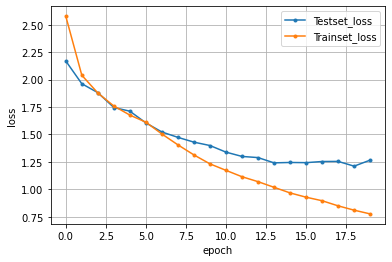

In [12]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', label = 'Trainset_loss')

# 그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel("loss")
plt.show()